In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# Exploration


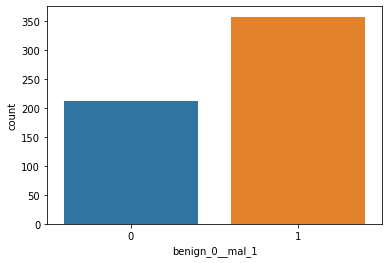

In [8]:
sns.countplot(x='benign_0__mal_1',data=df)

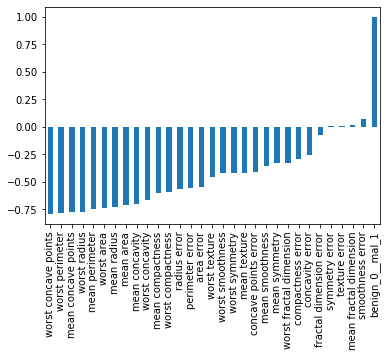

In [12]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

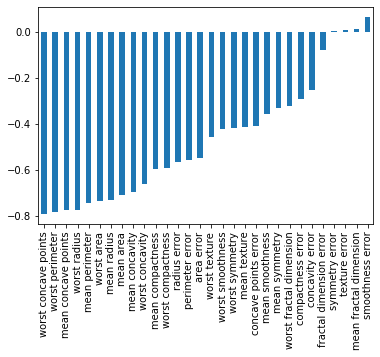

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

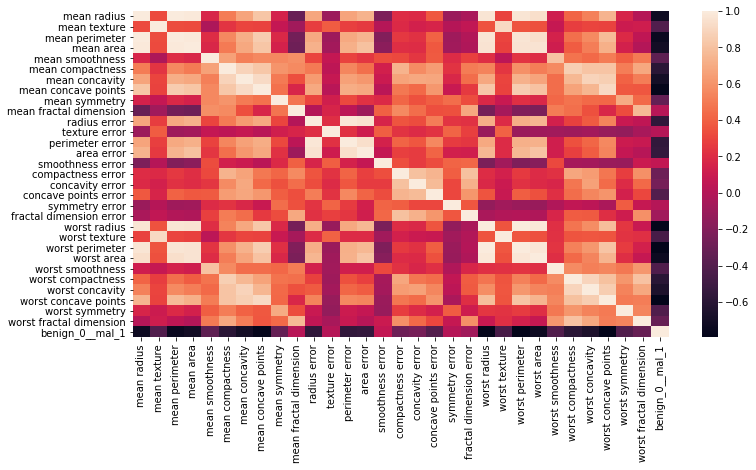

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

# Pre processing

In [18]:
X= df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler= MinMaxScaler()

We only want to fit your train data incase of data leakage, not test data

In [25]:
X_train =scaler.fit_transform(X_train)

In [26]:
X_test= scaler.transform(X_test)

# Creating Model and dealing with overfitting

In [27]:
from tensorflow.keras.models import Sequential

In [28]:
from tensorflow.keras.layers import Dense, Dropout

In [29]:
X_train.shape

(426, 30)

In [30]:
X_test.shape

(143, 30)

In [31]:
model = Sequential()
#first unit = 30 neurons
model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#BINARY CLASSFICATION SO SIGMOID
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')


In [33]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6839 - val_loss: 0.6645
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6447 - val_loss: 0.6255
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6031 - val_loss: 0.5819
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5592 - val_loss: 0.5359
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5138 - val_loss: 0.4921
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4698 - val_loss: 0.4468
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4272 - val_loss: 0.4039
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3873 - val_loss: 0.3627
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3507 - val_loss: 0.3256
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3189 - val_loss: 0.2931
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0563 - val_loss: 0.1171
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0575 - val_loss: 0.1215
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0558 - val_loss: 0.1201
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0549 - val_loss: 0.1142
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0547 - val_loss: 0.1175
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0606 - val_loss: 0.1168
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0557 - val_loss: 0.1279
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0528 - val_loss: 0.1151
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0525 - val_loss: 0.1265
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0530 - val_loss: 0.1177
Epoch 93/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0471 - val_loss: 0.1472
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0451 - val_loss: 0.1443
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0487 - val_loss: 0.1393
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0497 - val_loss: 0.1474
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0444 - val_loss: 0.1383
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0444 - val_loss: 0.1484
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0451 - val_loss: 0.1377
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0468 - val_loss: 0.1523
Epoch 172/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0439 - val_loss: 0.1462
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0449 - val_loss: 0.1514
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0418 - val_loss: 0.1683
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0396 - val_loss: 0.1664
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0408 - val_loss: 0.1643
Epoch 248/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0402 - val_loss: 0.1645
Epoch 249/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0406 - val_loss: 0.1635
Epoch 250/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0406 - val_loss: 0.1539
Epoch 251/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0414 - val_loss: 0.1767
Epoch 252/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0460 - val_loss: 0.1850
Epoch 253/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0415 - val_loss: 0.1525
Epoch 254/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0436 - val_loss: 0.1719
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0374 - val_loss: 0.1709
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0361 - val_loss: 0.1884
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0378 - val_loss: 0.1949
Epoch 329/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0381 - val_loss: 0.1712
Epoch 330/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0388 - val_loss: 0.1809
Epoch 331/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0376 - val_loss: 0.1872
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0373 - val_loss: 0.1688
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0361 - val_loss: 0.2264
Epoch 334/600
14/14 [==============================] - ETA: 0s - loss: 0.101 - 0s 4ms/step - loss: 0.0388 - val_loss: 0.1692
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0372

14/14 [==============================] - 0s 4ms/step - loss: 0.0419 - val_loss: 0.2367
Epoch 408/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0404 - val_loss: 0.1740
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0401 - val_loss: 0.2237
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0387 - val_loss: 0.2084
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0370 - val_loss: 0.1802
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0440 - val_loss: 0.2518
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0369 - val_loss: 0.1824
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0338 - val_loss: 0.2042
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0335 - val_loss: 0.1842
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0357 - val_loss: 0.2377
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0337 - val_loss: 0.2228
Epoch 489/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0345 - val_loss: 0.1863
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0461 - val_loss: 0.2574
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0338 - val_loss: 0.2076
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0354 - val_loss: 0.2404
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0314 - val_loss: 0.2072
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0328 - val_loss: 0.2274
Epoch 495/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0310 - val_loss: 0.2014
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0334 - val_loss: 0.1989
Epoch 497/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0327 - val_loss: 0.2477
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0285 - val_loss: 0.2313
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0271 - val_loss: 0.2291
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0305 - val_loss: 0.2266
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.2209
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0282 - val_loss: 0.2225
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0277 - val_loss: 0.2293
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0278 - val_loss: 0.2188
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0270 - val_loss: 0.2317
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0281 - val_loss: 0.1977
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0296 - val_loss: 0.2261
Epoc

# Plot both training and validation loss

In [34]:
losses =pd.DataFrame(model.history.history)

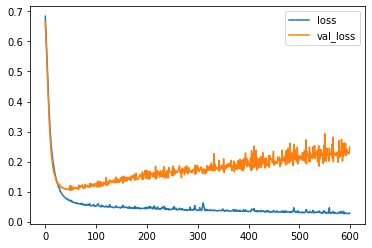

In [35]:
losses.plot()

This is the perfect example of OVERFITTING 
At a certain point, validation loss is increasing but the actual loss is decreasing. So have trained too much by using a large EPOCH

# Remodeling the model

In [36]:
model = Sequential()
#first unit = 30 neurons
model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#BINARY CLASSFICATION SO SIGMOID
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')


In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
help(EarlyStopping)
#monitor: Quantity to be monitored
#patience: Number of epochs with no improvement

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be 'loss', and mode would be 'min'. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Example:
 |  
 |  >>> callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
 |  >>> # This callback will stop the training when there is no improvement in
 |  >>> # the validation loss for three consecutive epochs.
 |  >>> model 

In [39]:
early_stop = EarlyStopping(monitor = 'val_loss',mode='min',verbose=1,patience=25)

In [40]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6771 - val_loss: 0.6563
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6458 - val_loss: 0.6272
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6109 - val_loss: 0.5827
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5717 - val_loss: 0.5480
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5358 - val_loss: 0.5113
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4955 - val_loss: 0.4646
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4526 - val_loss: 0.4188
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4091 - val_loss: 0.3738
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3663 - val_loss: 0.3321
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3271 - val_loss: 0.2933
Epoch 11

14/14 [==============================] - 0s 5ms/step - loss: 0.0487 - val_loss: 0.1061
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0514 - val_loss: 0.1019
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0474 - val_loss: 0.1155
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0501 - val_loss: 0.1029
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0487 - val_loss: 0.1081
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0462 - val_loss: 0.1035
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0466 - val_loss: 0.1041
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0466 - val_loss: 0.1033
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0457 - val_loss: 0.1071
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0509 - val_loss: 0.1069
Epoch 93/600


We can see that early stopping occured at 124/600 .
Now let's visualize the loss

In [41]:
model_loss=pd.DataFrame(model.history.history)


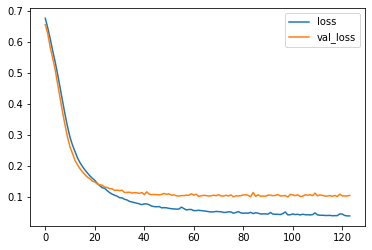

In [42]:
model_loss.plot()

#Val loss no longer increasing 

# DROPOUT LAYERS

In [ ]:
#Remodeling again 

In [ ]:
from tensorflow.keras.layers import Dropout

In [43]:
model = Sequential()
#first unit = 30 neurons
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#BINARY CLASSFICATION SO SIGMOID
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')


In [44]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6942 - val_loss: 0.6489
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6543 - val_loss: 0.6229
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6287 - val_loss: 0.6006
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6161 - val_loss: 0.5772
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5978 - val_loss: 0.5513
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5916 - val_loss: 0.5287
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5491 - val_loss: 0.5026
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5071 - val_loss: 0.4730
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5311 - val_loss: 0.4427
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5086 - val_loss: 0.4126
Epoch 11

14/14 [==============================] - 0s 6ms/step - loss: 0.1058 - val_loss: 0.0848
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1188 - val_loss: 0.0959
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1051 - val_loss: 0.0861
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1269 - val_loss: 0.1019
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0922 - val_loss: 0.0862
Epoch 88/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1094 - val_loss: 0.0859
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1007 - val_loss: 0.0882
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1200 - val_loss: 0.0932
Epoch 91/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1027 - val_loss: 0.0953
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1080 - val_loss: 0.0835
Epoch 93/600


STOPPED AT 148/600 USING DROPOUT AND EARLY STOP

In [45]:
model_loss=pd.DataFrame(model.history.history)

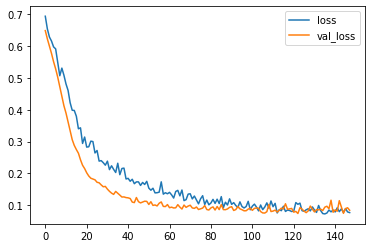

In [46]:
model_loss.plot()

EVEN BETTER BEHAVIOUR THAN BEFORE! MUCH IMPROVED THAN THE ORIGINAL OR JUST EARLY STOPPING LAYER

# FULL EVALUATION ON OUR CLASSES

In [50]:
predictions = model.predict_classes(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [53]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 1 87]]
